# Name: Reza Chehreghani
# Student Number: 810101401
# University of Tehran

# 1. Explain the mathematical intuition behind the following optimizers used to optimize deep neural networks.

## A. Stochastic Gradient Descent+ Momentum (SGD+ Momentum)

### Gradient descent
*Gradient descent* is an iterative method to find a local minimum of a cost function. It starts by filling $θ$ with random values (this is called *random initialization*). Then improves it gradually, taking one baby step at a time, each step attempting to decrease the cost function, until the algorithm converges to a minimum.

It updates the weights and biases $θ$ by directly subtracting the gradient of the cost function $J(θ)$ with regard to the weights and biases $∇_θJ(θ)$ multiplied by the learning rate $η$.

$\theta \leftarrow \theta - \eta \nabla_{\theta}J(\theta) $

where $η$ is the size of the steps, determined by
the *learning rate* hyperparameter.

### Stochastic Gradient Descent
The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, *Stochastic Gradient Descent* picks a random instance in the training set at every step and computes the gradients based only on that single instance.

### Momentum optimization
Gradient Descent does not care about what the earlier gradients were. If the local gradient is tiny, it goes very slowly.

*Momentum optimization* cares a great deal about what previous gradients were: at each iteration, it subtracts the local gradient from the *momentum vector* **m** (multiplied by the learning rate $η$), and it updates the weights and biases by adding this momentum vector. To prevent the momentum from growing too large, the algorithm introduces a new hyperparameter $β$, called the *momentum*, which must be set between 0 and 1. A typical momentum value is 0.9.

$
\begin{cases}
m \leftarrow \beta m - \eta \nabla_{\theta}J(\theta) \\
\theta \leftarrow \theta + m
\end{cases}
$

momentum optimization escapes from plateaus much faster than Gradient Descent.

## B. Adaptive Gradient Algorithm (Adagrad)

Gradient Descent starts by quickly going down the steepest slope, which does not point straight toward the global optimum, then it very slowly goes down to the bottom of the valley. It would be nice if the algorithm could correct its direction earlier to point a bit more toward the global optimum. The *AdaGrad algorithm* achieves this correction by scaling down the gradient vector along the steepest dimensions.

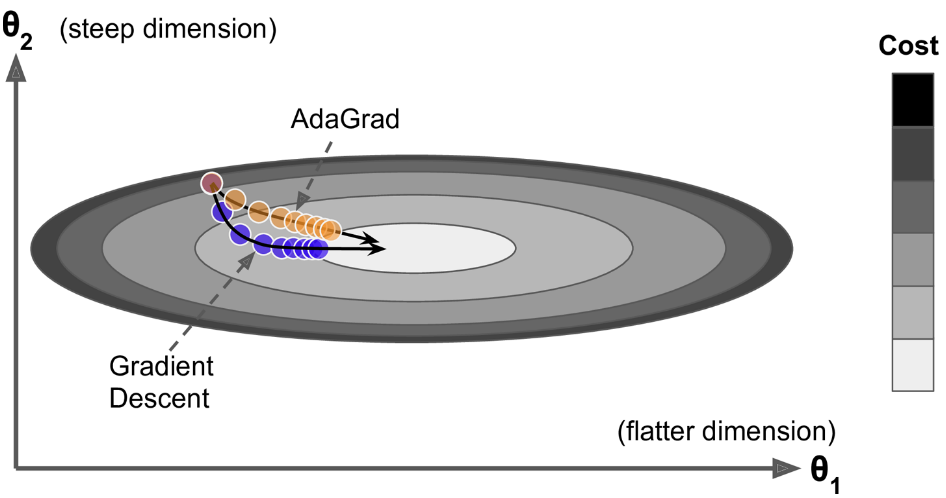

$
\begin{cases}
s \leftarrow s + \nabla_{\theta}J(\theta) \otimes \nabla_{\theta}J(\theta)  \\
\theta \leftarrow \theta - \eta \nabla_{\theta}J(\theta) \oslash \sqrt{s + \varepsilon}
\end{cases}
$

The first step accumulates the square of the gradients into the vector s (the ⊗ symbol represents the element-wise multiplication). If the cost function is steep along the $i^{th}$ dimension, then $s_i$ will get larger and larger at each iteration.

The second step is almost identical to Gradient Descent, but with one big difference:
the gradient vector is scaled down by a factor of s + ε (the ⊘ symbol represents the element-wise division, and ε is a smoothing term to avoid division by zero, typically
set to $10^{-10}$).

This algorithm decays the learning rate, but it does so faster for steep dimensions than for dimensions with gentler slopes. This is called an *adaptive learning rate*.
It helps point the resulting updates more directly toward the global optimum. One additional benefit is that it requires much less tuning of the learning rate hyperparameter η.

AdaGrad frequently performs well for simple quadratic problems, but it often stops too early when training neural networks. The learning rate gets scaled down so much
that the algorithm ends up stopping entirely before reaching the global optimum.

## C. Root Mean Square Propagation (RMSprop)

As we've seen, AdaGrad runs the risk of slowing down a bit too fast and never converging to the global optimum. The RMSProp algorithm fixes this by accumulating only the gradients from the most recent iterations (as opposed to all the gradients since the beginning of training). It does so by using exponential decay in the first step.

$
\begin{cases}
s \leftarrow \beta s + (1 - \beta)\nabla_{\theta}J(\theta) \otimes \nabla_{\theta}J(\theta)  \\
\theta \leftarrow \theta - \eta \nabla_{\theta}J(\theta) \oslash \sqrt{s + \varepsilon}
\end{cases}
$

The decay rate β is typically set to 0.9. Yes, it is once again a new hyperparameter, but
this default value often works well, so you may not need to tune it at all.

Except on very simple problems, this optimizer almost always performs much better than AdaGrad. In fact, it was the preferred optimization algorithm of many researchers until Adam optimization came around.

sourse: A. Géron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media, 2nd Edition.

# 2. Explore the literature and find out which of the above optimizers are preferred in real-world applications. In doing so, you should compare the performance of the above optimizers and address the advantages and disadvantages of each when training neural networks.

In stochastic gradient descent, randomness is good to escape from local optima, but the major pitfall of stochastic gradient descent is that looking at the error
incurred one example at a time may not be a good enough approximation of the error surface. This, in turn, could potentially make gradient descent take a significant
amount of time. One way to combat this problem is using *mini-batch gradient descent*.

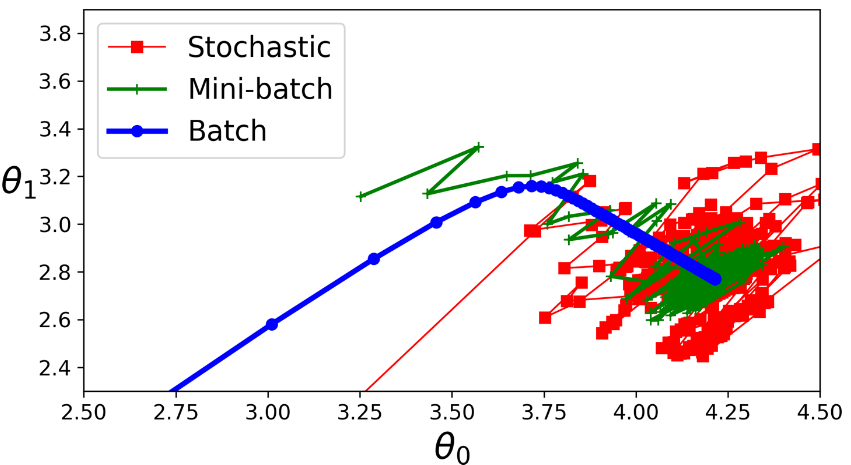

About momentum optimization, If the gradients have the same value, the step size will approach $\sum_{i=0}^{\infty}\beta^i=1/(1-\beta)$ times the step size without momentum. This allows momentum optimization to escape from plateaus much faster than Gradient Descent.

We display how the cost function changes over time by comparing the TensorBoard visualizations. The figure demonstrates that to achieve a cost of 0.1 without momentum (left) requires nearly 18,000 steps (minibatches), whereas with momentum (right), we require just over 2,000.

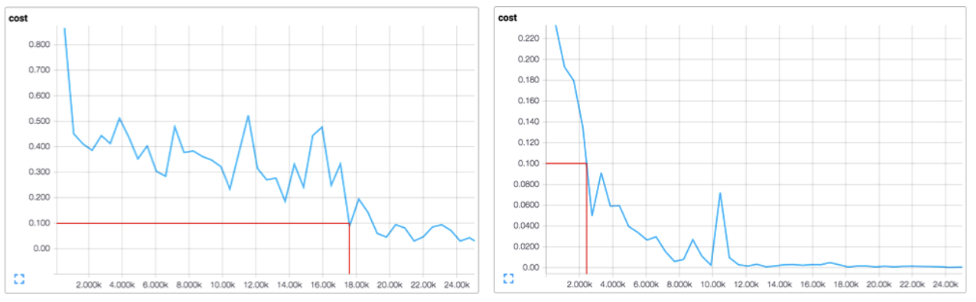

Empirically, AdaGrad has a tendency to cause a premature drop in learning rate, and as a result doesn't work particularly well for some deep models, but RMSProp attempts to remedy this shortcoming and enables us to “toss out” measurements that we made a long time ago.

Overall, RMSProp has been shown to be a highly effective optimizer for deep neural networks, and is a default choice for many seasoned practitioners.

The most popular algorithms are mini-batch gradient descent, mini-batch gradient with momentum, RMSProp, RMSProp with momentum, Adam, and AdaDelta.

Adaptive optimization methods (including Adagrad, and RMSProp optimization) are often great and converging fast
to a good solution.

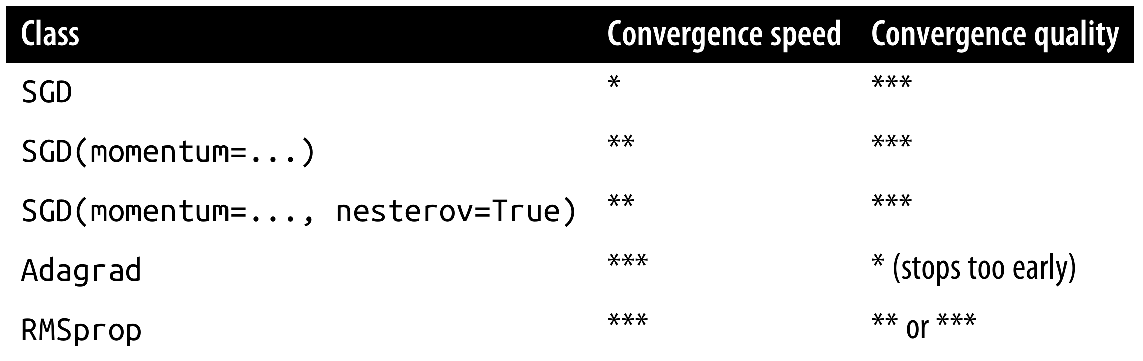

sourses: \\
[1]. A. Géron, Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly, 2nd Edition. \\
[2]. N. Buduma, Fundamentals of Deep Learning Designing Next-Generation Machine Intelligence Algorithms. O'Reilly, 2017. \\
[3]. David L. Poole and Alan K. Mackworth, Artificial Intelligence Foundations of Computational Agents. Third Edition.![image.png](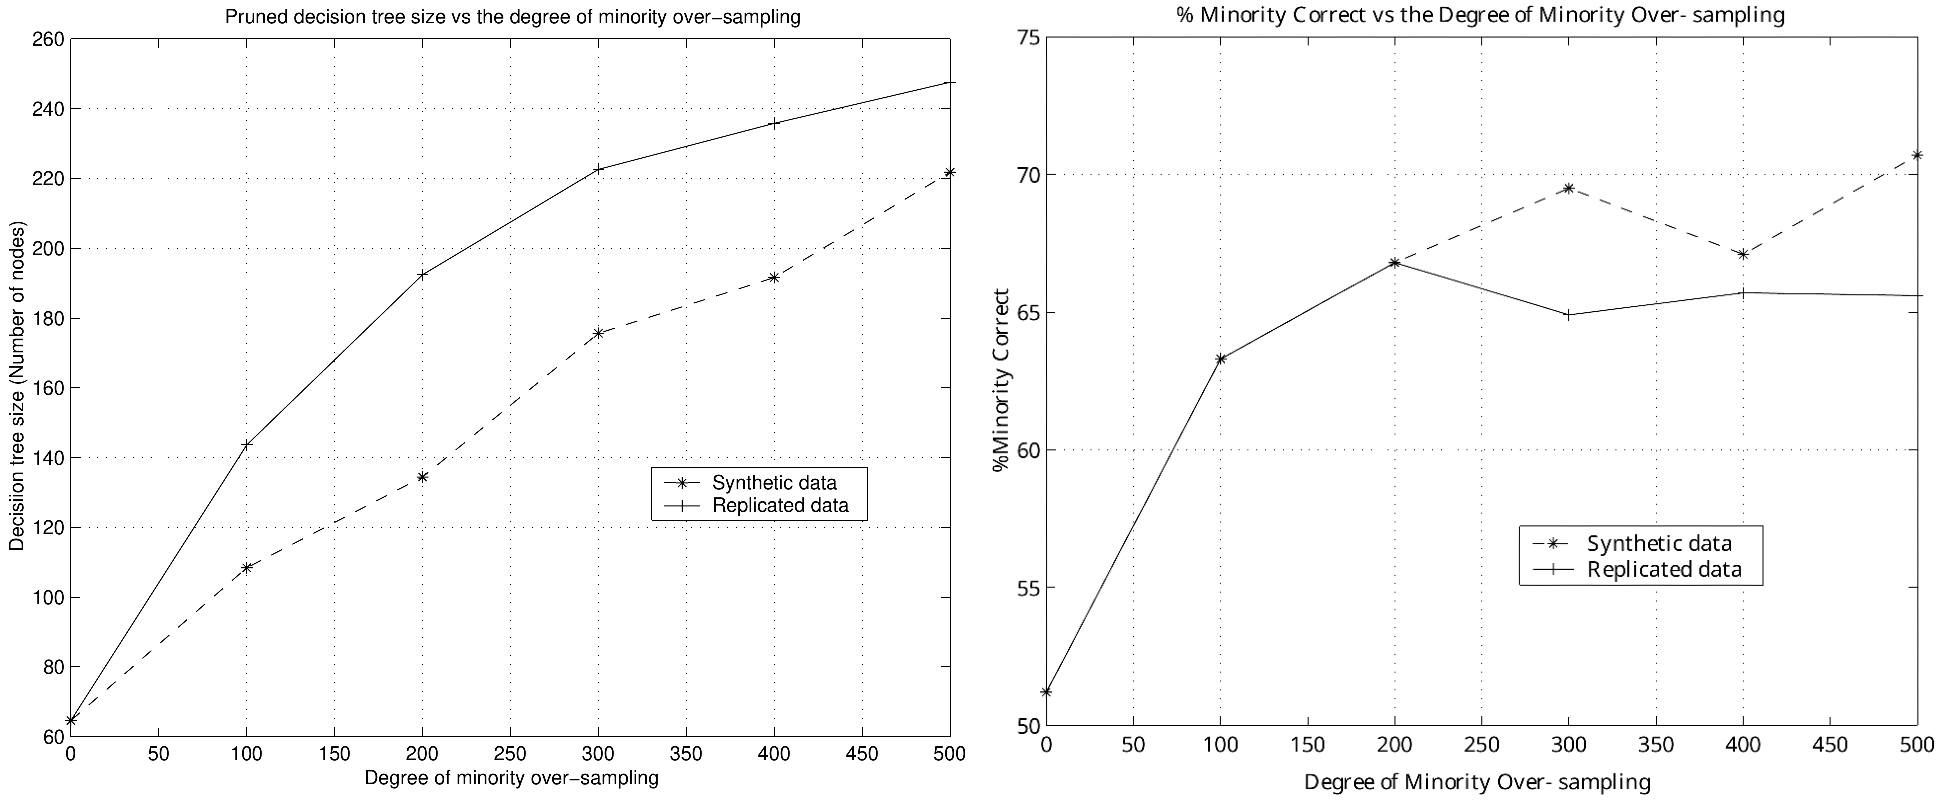![image.png](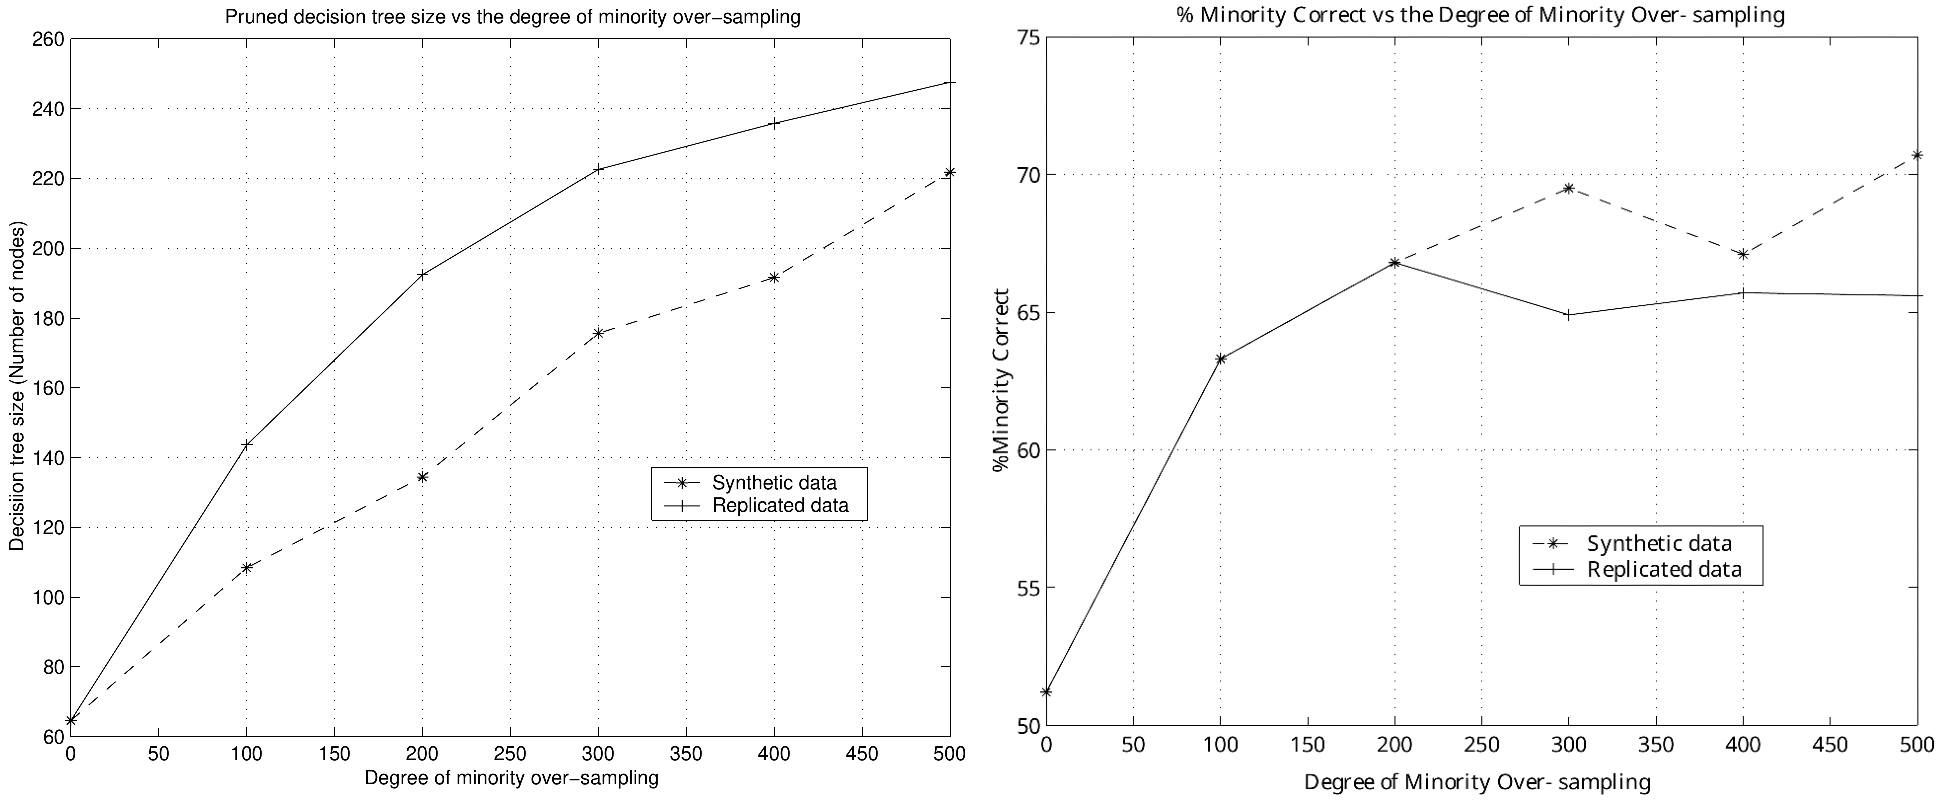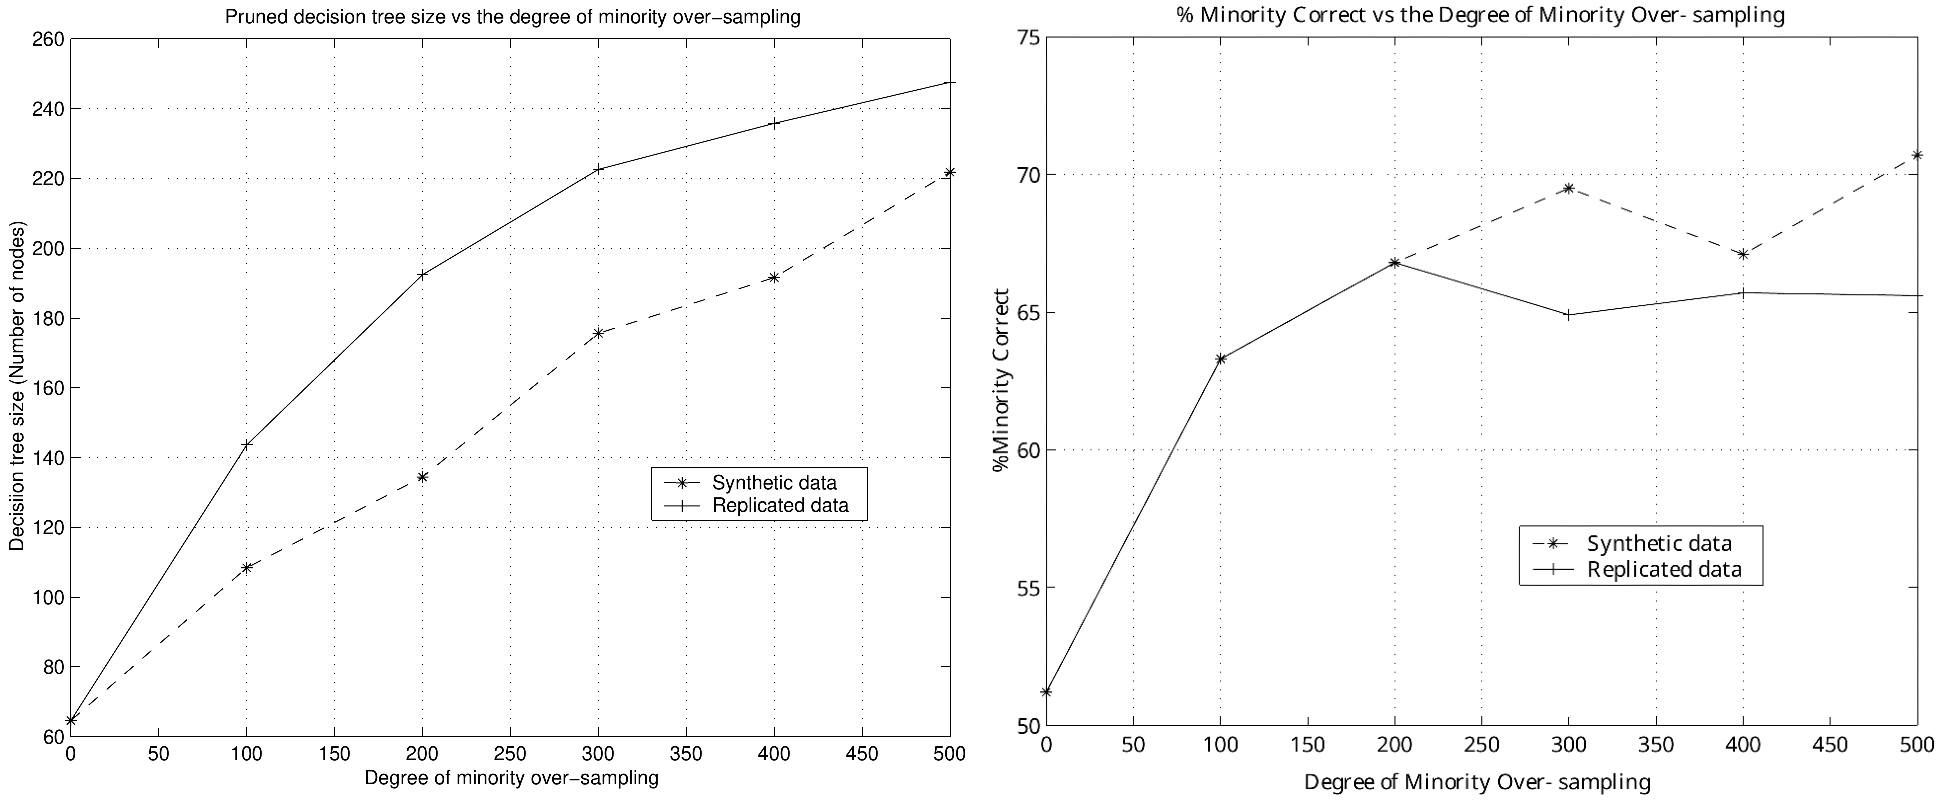))

# 3. In machine learning/deep learning models, we often encounter imbalanced datasets in which one class has fewer instances than the other. An imbalance in the number of samples/examples leads to suboptimal performance in our machine learning/deep learning models. To solve this problem, various techniques have been proposed, including the Synthetic Minority Oversampling Technique (SMOTE). SMOTE is a sampling method that oversamples the minority class. You should explain the mathematics of the SMOTE algorithm and show how it can improve the performance of our deep neural network models. You should provide an example using Python and TensorFlow.

## Explanation

We propose an over-sampling approach in which the minority class is over-sampled by creating “synthetic” examples rather than by over-sampling with replacement. The minority class is over-sampled by taking each minority class sample and introducing synthetic examples along the line segments joining any/all of the *k* minority class nearest neighbors. Depending upon the amount of over-sampling required, neighbors from the *k* nearest neighbors are randomly chosen.

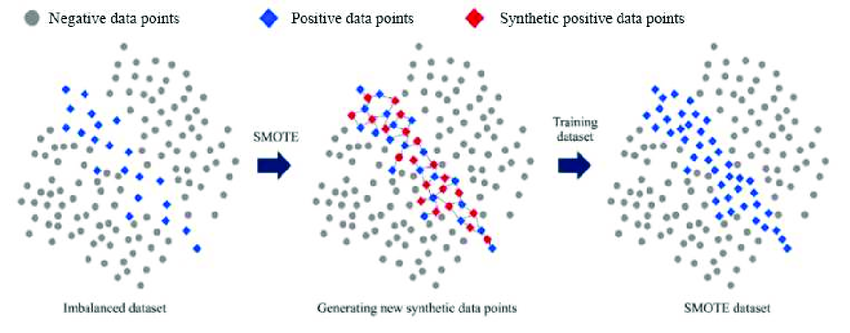

Synthetic samples are generated in the following way: Take the difference between the feature vector (sample) under consideration and its nearest neighbor. Multiply this difference by a random number between 0 and 1, and add it to the feature vector under consideration.

$F_0$ is the sample for which k-nearest neighbors are being identified. $F$ is one of its k-nearest neighbors.
Let:

$F' = F_0 + rand(0-1) * (F - F_0)$

rand(0-1) generates a random number between 0 and 1.

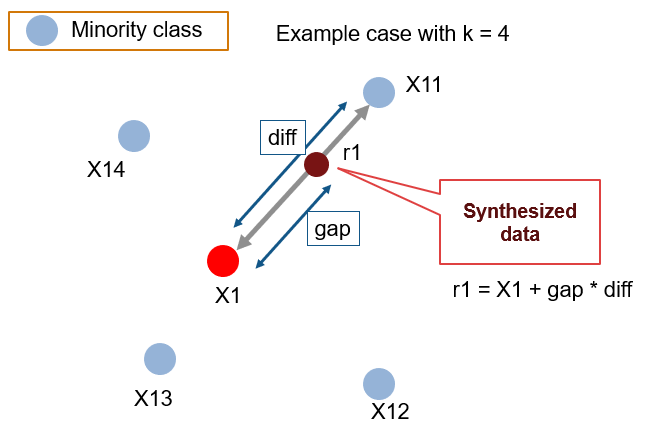

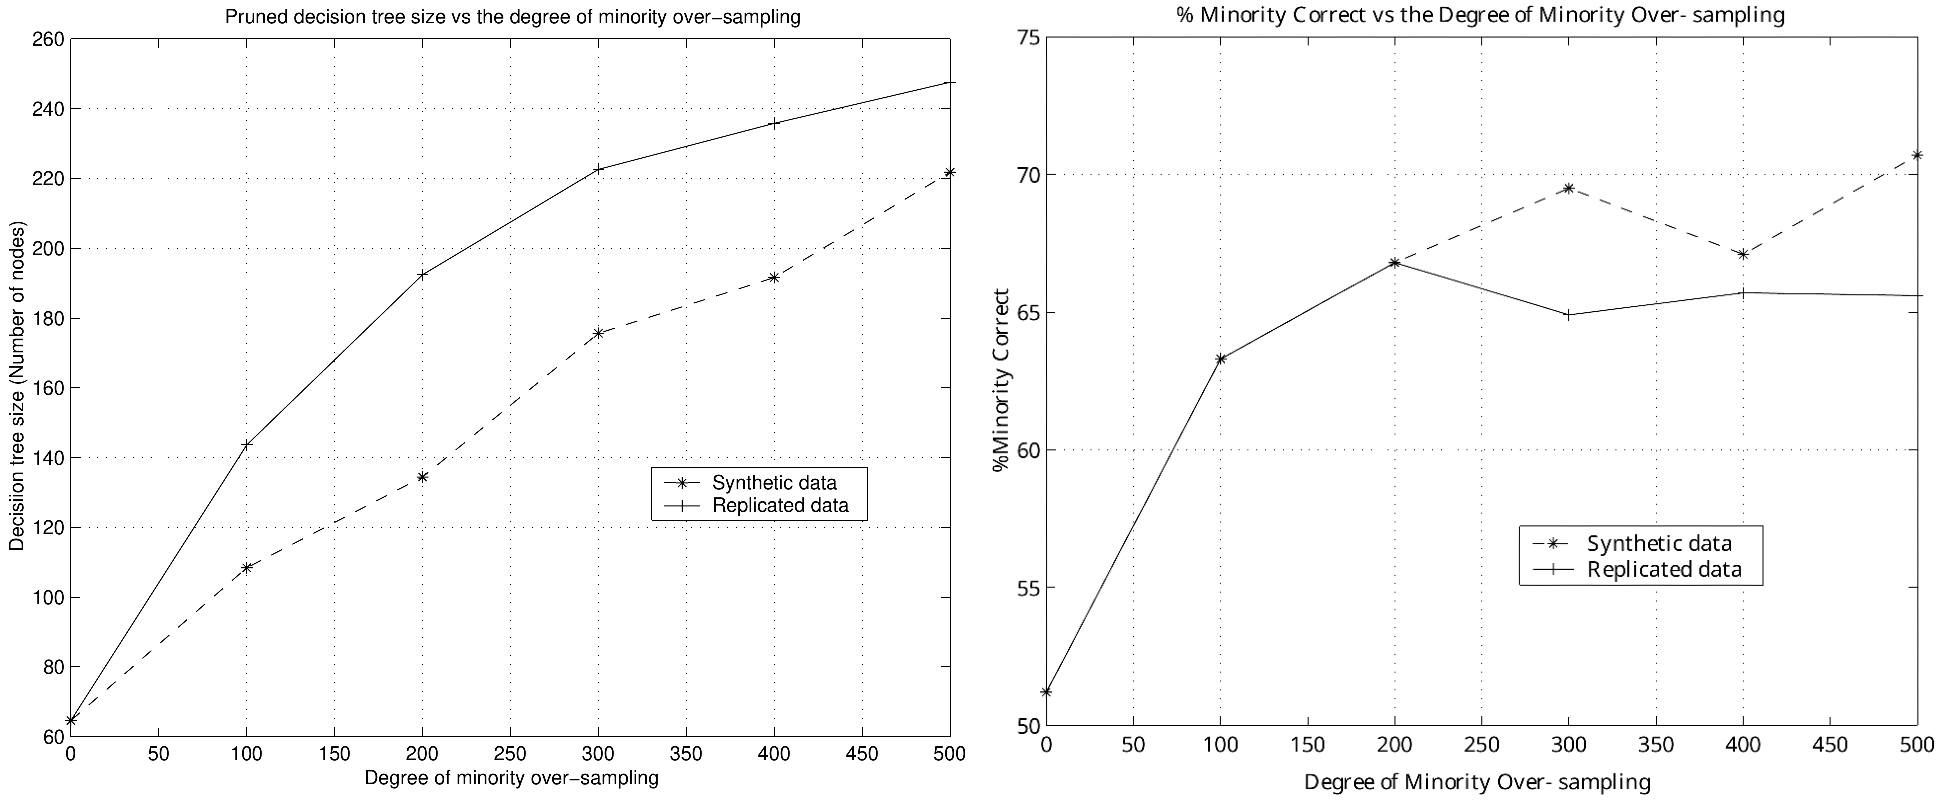

source: Nitesh V. Chawla, SMOTE: Synthetic Minority Over-sampling Technique, Journal of Artificial Intelligence Research 16 (2002) 321-357.

## Example

### Without SMOTE

We begin by importing the required libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

In this example, we will make use of the Credit Card Fraud Detection dataset to train a model to determine whether a given transaction is fraudulent. We read the CSV file and store its contents in a Pandas DataFrame as follows:

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


As we can see, there are significantly more negative samples than positive samples.

In [ ]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

For simplicity, we remove the time dimension.

In [ ]:
df = df.drop(['Time'], axis=1)

We split the dataset into features and labels.

In [ ]:
X = df.drop(['Class'], axis=1)
y = df['Class']

In order to evaluate the performance of our model, we split the data into training and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Now, we define our model, using the linear activation function for inner layer and sigmoid for output layer.

In [ ]:
model = keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_dim=X.shape[1]))
model.add(layers.Dense(1, activation='sigmoid'))

We choose binary crossentropy loss function, because we have a binary classificaition problem.

In [ ]:
model.compile(loss='binary_crossentropy')

We fit our model to the training set.

In [ ]:
model.fit(X_train, y_train)

7121/7121 [==============================] - 42s 6ms/step - loss: 0.0664


Finally, we use our model to predict whether a transaction is fraudulent given what it has learnt.

In [ ]:
y_pred = model.predict(X_test)

1781/1781 [==============================] - 3s 2ms/step


Our model prediction gives us the probability of beloging to fraudulent class. so we set a threshold to seperate the prediction.

In [ ]:
threshold = 0.5
y_pred = y_pred > threshold

If we used accuracy to measure the model's performance, it could obtain an accuracy of 99% by simply predicting false every time. It's for this reason that we use a confusion matrix to evaluate the model's performance. As we can see, our model classified 23 samples as non-fraudulent when, in fact, they were.

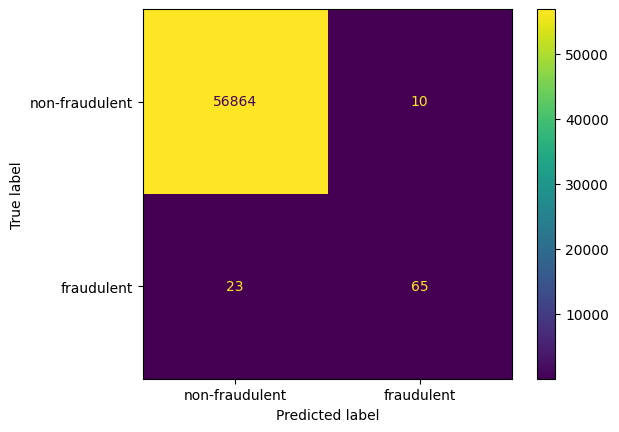

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['non-fraudulent', 'fraudulent'])

cm_display.plot()
plt.show()

For ease of comparison, if we wanted a single number to gauge the model's performance, we could use recall. Recall is equal to the number of true positives divided by the sum of true positives and false negatives.

In [ ]:
recall_score(y_test, y_pred)

0.7386363636363636

### With SMOTE

We import the SMOTE class.

In [ ]:
from imblearn.over_sampling import SMOTE

We instantiate an instance of the SMOTE class. It's worth noting that, by default, it will ensure that there are an equal number of positive samples as negative samples.

In [ ]:
sm = SMOTE()

We apply the SMOTE algorithm to the dataset as follows:

In [ ]:
X_res, y_res = sm.fit_resample(X, y)

As we can see, there are equal number of negative and positive samples.

In [ ]:
y_res.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

Again, we split the dataset, train the model and predict whether the samples in the testing dataset should be considered fraudulent or not.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2)

model = keras.Sequential()
model.add(layers.Dense(16, activation='relu', input_dim=X.shape[1]))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

3554/3554 [==============================] - 8s 2ms/step


If we look at the confusion matrix, we can see that there are almost an equal number of positive samples as negative samples and the model has few false negatives. Ergo, the recall is near to 1.

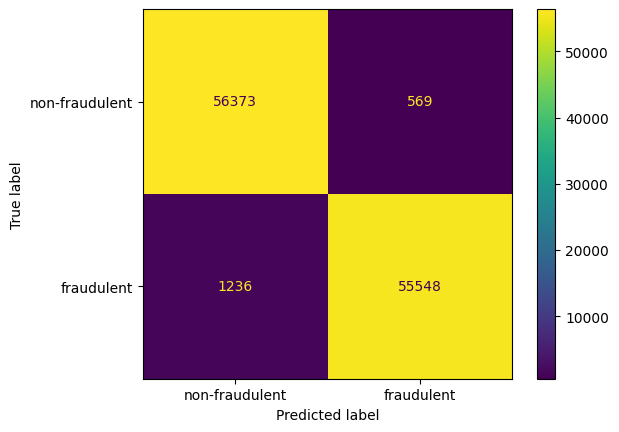

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['non-fraudulent', 'fraudulent'])

cm_display.plot()
plt.show()

In [ ]:
recall_score(y_test, y_pred)

0.9782333051563821

sources: \\
[1]. https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c \\
[2]. https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

# 4. I have provided you with a dataset in our AI course Google Link and named it [Assignment 1-Dataset]. The feature names are F1, F2, F3, etc. The last column is the target.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## A. You should build a classification model employing a Deep Neural Network using this dataset. You should elucidate all the codes in your notebook.

At first, we import necessary libraries.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adagrad, RMSprop
from imblearn.over_sampling import SMOTE

Then we save the path of dataset csv file.

In [ ]:
data_path = '/content/drive/MyDrive/Artificial Intelligence/810101401_Reza_Chehreghani/Assignment 1-Dataset.csv'

To read csv file, we use pandas library and save it as a pandas DataFrame.

In [ ]:
df = pd.read_csv(data_path)

The dataset has a structure like this:

In [ ]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F86,F87,F88,F89,F90,F91,F92,Target,Unnamed: 93,Unnamed: 94
0,1,7,2,29,2,6,0,0,0,81,...,0,66,6401,4,21.0,0,2,2,NaN,NaN
1,1,28,0,42,2,4,0,0,0,14,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
2,1,7,0,42,2,4,0,0,0,10,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
3,1,28,0,42,2,4,0,0,0,11,...,36,63,3413,4,15.0,36,1,2,NaN,NaN
4,2,7,0,42,2,6,0,0,0,13,...,36,63,3413,4,15.0,36,1,2,NaN,NaN


Data set description:

In [ ]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F86,F87,F88,F89,F90,F91,F92,Target,Unnamed: 93,Unnamed: 94
count,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,1.113040e+05,111304.000000,...,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,111304.000000,0.0,0.0
mean,1.384011,16.234637,1.141181,109.371424,1.678242,4.501159,0.116312,0.031535,3.779658e+06,38.706920,...,32.613482,63.606753,4096.888638,1.325262,13.327666,32.536432,1.247233,0.811660,NaN,NaN
std,0.486584,13.833192,1.729046,119.132927,0.467153,1.828697,1.364295,0.574920,2.086547e+08,47.314877,...,25.041610,2.130230,2210.531994,1.848414,8.912911,25.294460,0.971636,0.896797,NaN,NaN
min,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,...,0.000000,61.000000,1403.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
25%,1.000000,6.000000,0.000000,26.000000,1.000000,4.000000,0.000000,0.000000,0.000000e+00,10.000000,...,24.000000,61.000000,1416.000000,0.000000,0.000000,23.000000,1.000000,0.000000,NaN,NaN
50%,1.000000,7.000000,0.000000,50.000000,2.000000,4.000000,0.000000,0.000000,0.000000e+00,22.000000,...,36.000000,63.000000,3454.000000,0.000000,18.000000,36.000000,1.000000,0.000000,NaN,NaN
75%,2.000000,27.000000,2.000000,170.000000,2.000000,6.000000,0.000000,0.000000,0.000000e+00,48.000000,...,36.000000,66.000000,6444.000000,4.000000,18.000000,36.000000,1.000000,2.000000,NaN,NaN
max,4.000000,44.000000,6.000000,932.000000,2.000000,8.000000,88.000000,50.000000,3.889600e+10,332.000000,...,300.000000,70.000000,9960.000000,7.000000,36.000000,300.000000,87.000000,2.000000,NaN,NaN


We have a dataset with size of 111304, and for each element, it provides 95 kinds of data.

In [ ]:
df.shape

(111304, 95)

As we can see, all columns except last two ones provides complete data and last two columns don't have any data.

In [ ]:
df.count()

F1             111304
F2             111304
F3             111304
F4             111304
F5             111304
                ...  
F91            111304
F92            111304
Target         111304
Unnamed: 93         0
Unnamed: 94         0
Length: 95, dtype: int64

So we drop out last two columns inplace.

In [ ]:
df.drop(['Unnamed: 93', 'Unnamed: 94'], axis=1, inplace=True)

Then we check our dataset for any missing data or nan data. as is evident, there isn't any nan data.

In [ ]:
df.isna().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
         ..
F89       0
F90       0
F91       0
F92       0
Target    0
Length: 93, dtype: int64

Because our model works with number, we check the dataset to find non-numerical values. there isn't any non-numerical values.

In [ ]:
df.dtypes

F1          int64
F2          int64
F3          int64
F4          int64
F5          int64
           ...   
F89         int64
F90       float64
F91         int64
F92         int64
Target      int64
Length: 93, dtype: object

We count the *target* column to find the number of classes. *Target* values are 0, 1, and 2. So we have three classes.

In [ ]:
df['Target'].value_counts()

Target
0    57213
2    36250
1    17841
Name: count, dtype: int64

To have a better model, we shuffle the dataset rows.

In [ ]:
df = df.sample(frac=1)

Now, we separate inputs and outputs.

In [ ]:
X = df.drop('Target', axis=1)
y = df['Target']

The format of inputs is as follows:

In [ ]:
X.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F83,F84,F85,F86,F87,F88,F89,F90,F91,F92
110435,2,42,0,482,2,3,0,0,0,6,...,66,0,18.0,36,66,6467,0,18.0,36,1
18512,2,27,3,361,2,4,0,0,0,174,...,66,4,24.0,0,66,6406,4,21.0,0,6
84550,2,27,0,29,2,6,0,0,0,4,...,61,0,0.0,60,61,1404,0,0.0,60,1
109046,1,21,0,261,2,6,0,0,0,5,...,61,0,0.0,60,61,1405,0,0.0,60,2
77861,1,26,0,109,2,6,0,0,0,8,...,61,0,0.0,48,61,1404,0,0.0,48,1


And the head of outputs or labels:

In [ ]:
y.head()

110435    2
18512     1
84550     2
109046    2
77861     2
Name: Target, dtype: int64

in this dataset, we have 111304 inputs, and each input has 92 features.

In [ ]:
X.shape

(111304, 92)

For each input, we have a label. So we have 111304 labels too.

In [ ]:
y.shape

(111304,)

## B. You should use SMOTE with Adagrad and RMSprop and compare your results. Make sure you correctly apply the SMOTE to your data.

We instantiate an instance of the SMOTE class. It's worth noting that, by default, it will ensure that there are an equal number of samples for each class.

In [ ]:
sm = SMOTE()

We apply the SMOTE algorithm to the dataset as follows:

In [ ]:
X, y = sm.fit_resample(X, y)

As we can see, there are equal number of samples for each class.

In [ ]:
y.value_counts()

Target
2    57213
1    57213
0    57213
Name: count, dtype: int64

Here, we define a function to make our model. We choose the *Sequential* molel. \\
After a lot of trial and error, I decided to have three inner or hidden layers with 128, 64, and 32 neurons. \\
As I tested, BatchNormalization leads to better results and makes training faster and more stable through normalization of the layers' inputs by re-centering and re-scaling. So I put a BatchNormalization after each layer activation function. \\
I set *relu* as the activation function of the hidden layers. Bacause wa want to create a multi class classification, I set the activation function of the output layer to *softmax*. \\
Then to prevent *Overfitting*, before each layer, I put a Dropout with rate of 0.5 that randomly sets input units to 0 with a frequency of rate at each step during training time. \\
Because *y* (labels) are integers to specify classes, we use *sparse_categorical_crossentropy* loss function instead of *categorical_crossentropy*. \\
And also add the *accuracy* metric.

In [ ]:
def make_model(optimizer):
    model = Sequential([
        BatchNormalization(input_dim=92),

        Dense(128, 'relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(64, 'relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(32, 'relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(3, 'softmax')
    ])

    model.compile(optimizer, 'sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

We define another function to fit our model. We use keras fit function with batch size of 128 and 300 epochs. Also I split the dataset to train and validation parts in a ratio of four to one. At last, return the history of the fit process.

In [ ]:
def fit_model(model):
    history = model.fit(X, y, 128, 300, validation_split=0.2)
    return history

Now, we make the first model with *Adagrad* optimizer and a learning rate of 0.01. Then print the summary of the model.

In [ ]:
Adagrad_model = make_model(Adagrad(0.01))
Adagrad_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_8 (Bat  (None, 92)                368       
 chNormalization)                                                
                                                                 
 dense_8 (Dense)             (None, 128)               11904     
                                                                 
 batch_normalization_9 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_10 (Ba  (None, 64)               

We fit the model.

In [ ]:
Adagrad_history = fit_model(Adagrad_model)

Epoch 1/300
1073/1073 [==============================] - 15s 12ms/step - loss: 0.9317 - accuracy: 0.5617 - val_loss: 0.8437 - val_accuracy: 0.3639
Epoch 2/300
1073/1073 [==============================] - 11s 10ms/step - loss: 0.8245 - accuracy: 0.6013 - val_loss: 0.8266 - val_accuracy: 0.3742
Epoch 3/300
1073/1073 [==============================] - 7s 6ms/step - loss: 0.8031 - accuracy: 0.6099 - val_loss: 0.8056 - val_accuracy: 0.4238
Epoch 4/300
1073/1073 [==============================] - 5s 5ms/step - loss: 0.7919 - accuracy: 0.6164 - val_loss: 0.8186 - val_accuracy: 0.4652
Epoch 5/300
1073/1073 [==============================] - 5s 4ms/step - loss: 0.7841 - accuracy: 0.6194 - val_loss: 0.7787 - val_accuracy: 0.5025
Epoch 6/300
1073/1073 [==============================] - 6s 6ms/step - loss: 0.7756 - accuracy: 0.6235 - val_loss: 0.7670 - val_accuracy: 0.4743
Epoch 7/300
1073/1073 [==============================] - 5s 4ms/step - loss: 0.7713 - accuracy: 0.6262 - val_loss: 0.7590 - va

This time, we make the socond model with *RMSprop* optimizer and a learning rate of 0.0001 and print the summary.

In [ ]:
RMSprop_model = make_model(RMSprop(0.0001))
RMSprop_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_12 (Ba  (None, 92)                368       
 tchNormalization)                                               
                                                                 
 dense_12 (Dense)            (None, 128)               11904     
                                                                 
 batch_normalization_13 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_14 (Ba  (None, 64)               

We fit the model.

In [ ]:
RMSprop_history = fit_model(RMSprop_model)

Epoch 1/300
1073/1073 [==============================] - 8s 5ms/step - loss: 1.2919 - accuracy: 0.4724 - val_loss: 0.9394 - val_accuracy: 0.3351
Epoch 2/300
1073/1073 [==============================] - 6s 6ms/step - loss: 1.0153 - accuracy: 0.5480 - val_loss: 0.8857 - val_accuracy: 0.3371
Epoch 3/300
1073/1073 [==============================] - 6s 6ms/step - loss: 0.9050 - accuracy: 0.5751 - val_loss: 0.8704 - val_accuracy: 0.3412
Epoch 4/300
1073/1073 [==============================] - 5s 5ms/step - loss: 0.8480 - accuracy: 0.5948 - val_loss: 0.8520 - val_accuracy: 0.3583
Epoch 5/300
1073/1073 [==============================] - 7s 6ms/step - loss: 0.8173 - accuracy: 0.6061 - val_loss: 0.8317 - val_accuracy: 0.3957
Epoch 6/300
1073/1073 [==============================] - 5s 5ms/step - loss: 0.8016 - accuracy: 0.6140 - val_loss: 0.8113 - val_accuracy: 0.4280
Epoch 7/300
1073/1073 [==============================] - 7s 7ms/step - loss: 0.7885 - accuracy: 0.6209 - val_loss: 0.7965 - val_ac

## C. You should plot the loss and accuracy for the training and validation. See the plots below.

To plot the loss and accuracy for the training and validation, we define this function.

In [ ]:
def plot_loss_and_accuracy(history, title):
    plt.figure(figsize=[2 * plt.rcParams['figure.figsize'][0], plt.rcParams['figure.figsize'][1]])
    plt.suptitle(title, size='xx-large')

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Model Loss')
    plt.xlabel('No of epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('No of epochs')
    plt.legend()
    plt.show()

We plot the loss and accuracy of model with Adagrad optimizer for the training and validation.

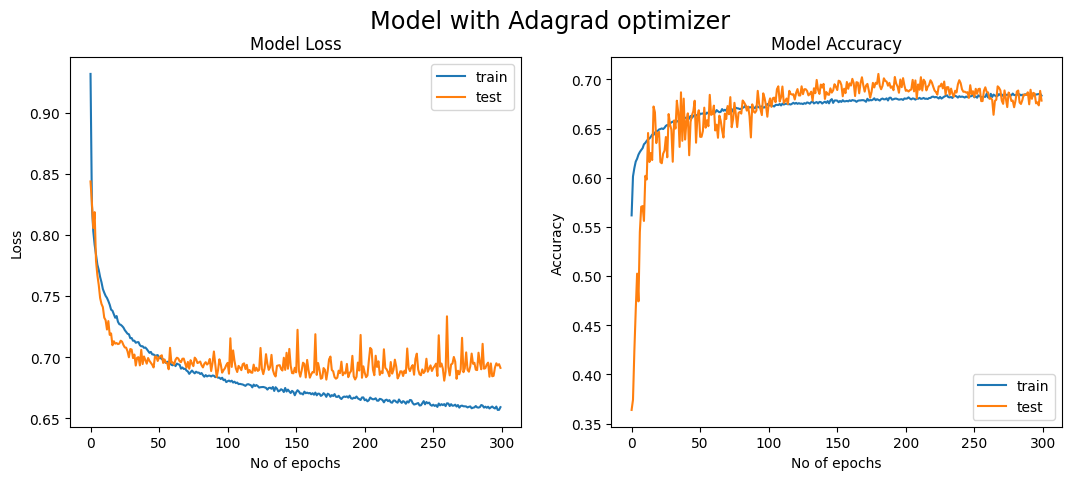

In [ ]:
plot_loss_and_accuracy(Adagrad_history, 'Model with Adagrad optimizer')

Again, we plot the loss and accuracy of model with RMSprop optimizer for the training and validation.

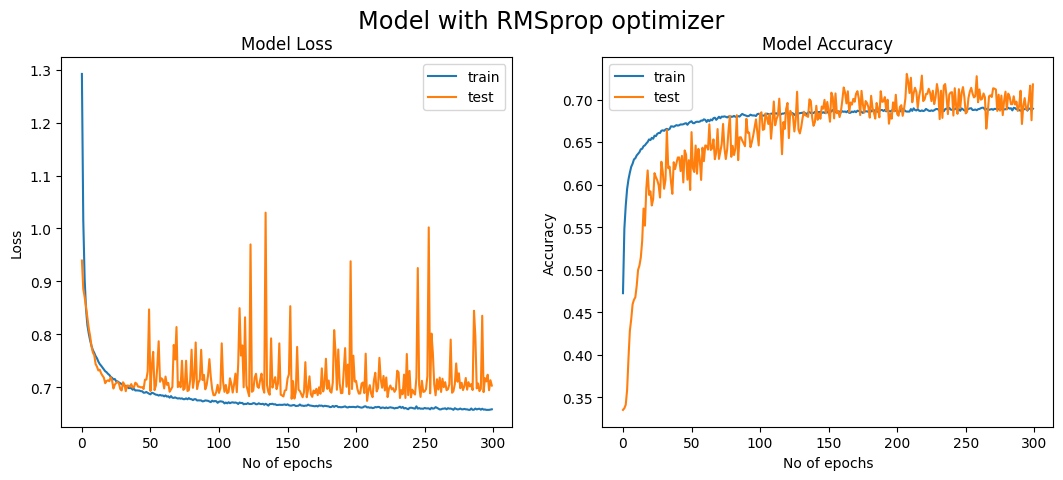

In [ ]:
plot_loss_and_accuracy(RMSprop_history, 'Model with RMSprop optimizer')

## History of Experiments

I have tested the model with vary range of hyperparameters (In all this examples, the optimizer is RMSprop.):

Model 1: two layers with 64 and 32 neurons, batch size 32, learning rate 0.001

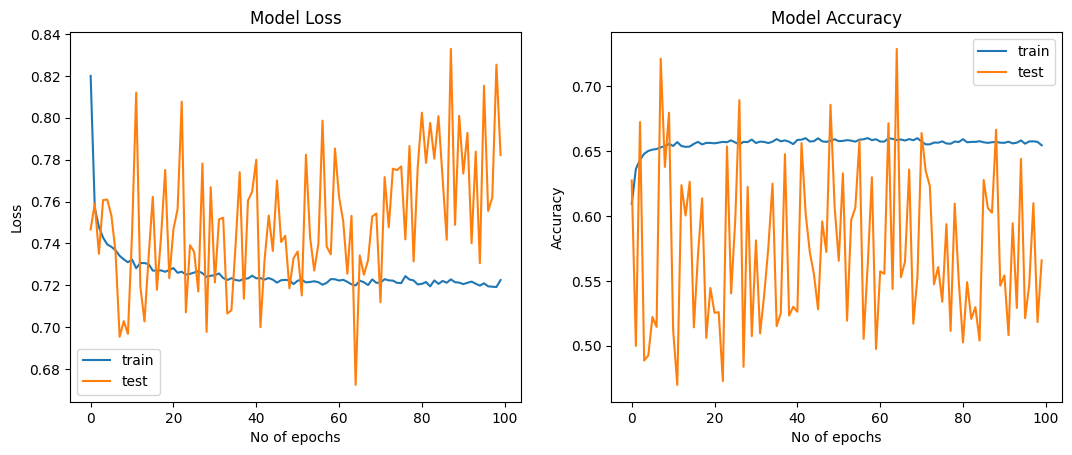

Model 2: two layers with 64 and 32 neurons, batch size 64, learning rate 0.001

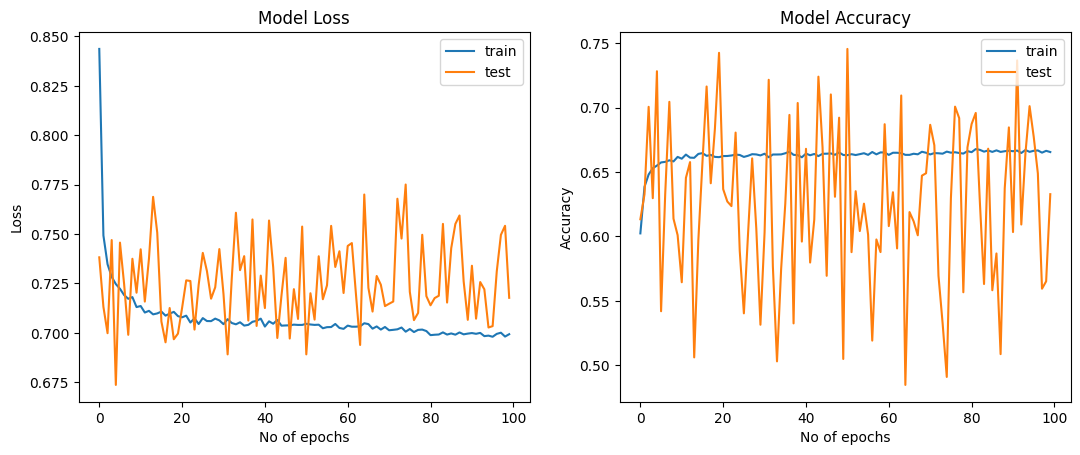

Model 3: two layers with 64 and 32 neurons, batch size 256, learning rate 0.0001

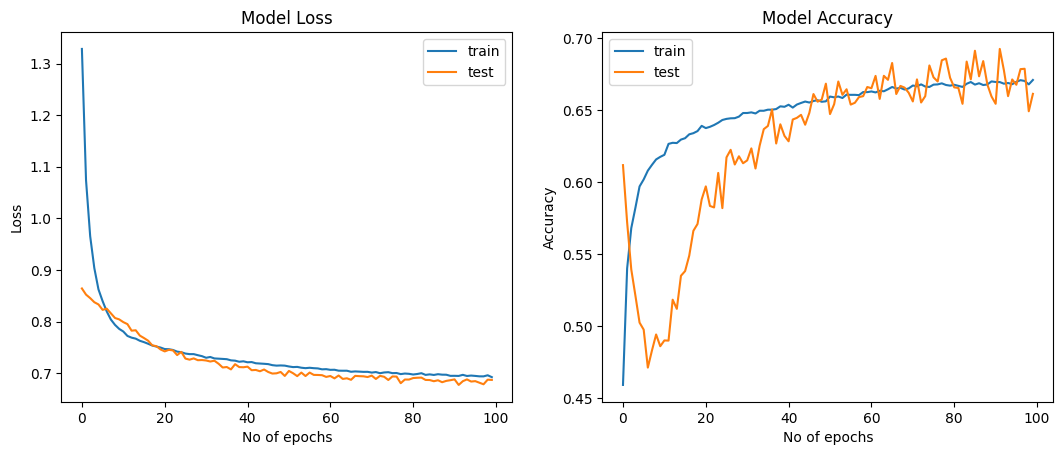

Model 4: two layers with 128 and 64 neurons, batch size 256, learning rate 0.0001

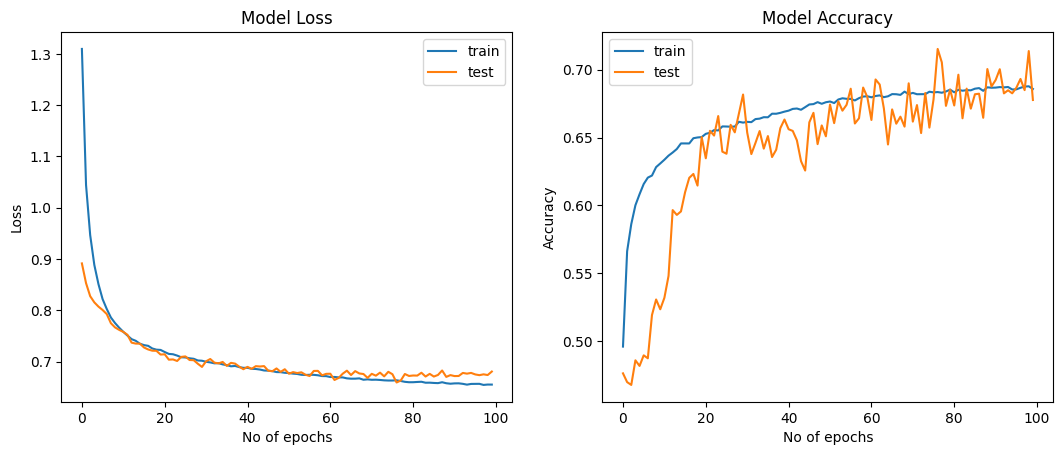

Model 5: two layers with 128 and 64 neurons, batch size 128, learning rate 0.00005

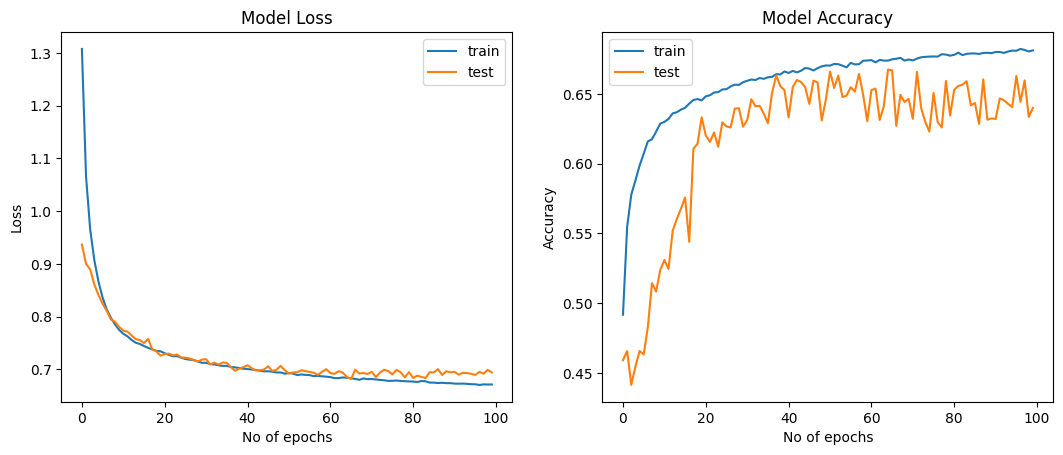

Model 6: two layers with 64 and 32 neurons, batch size 128, learning rate 0.00005

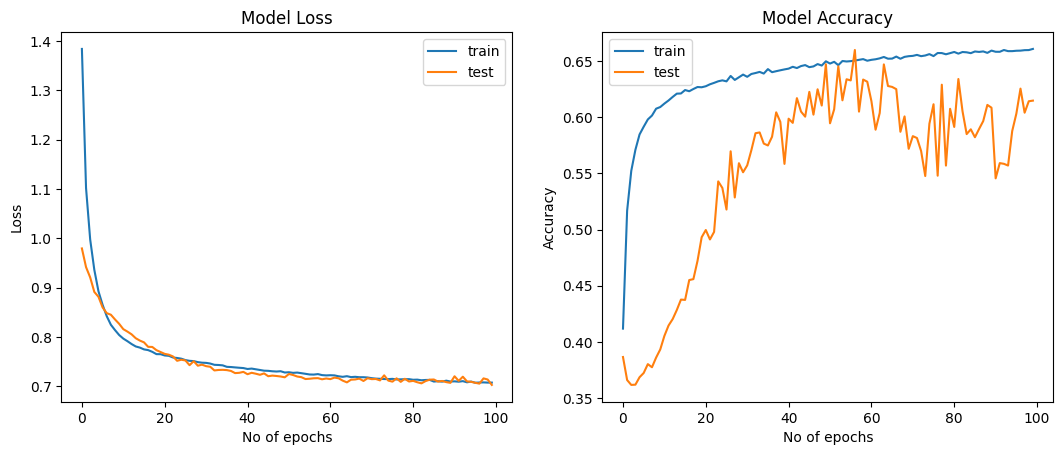

Model 7: three layers with 64, 32, and 16 neurons, batch size 128, learning rate 0.001

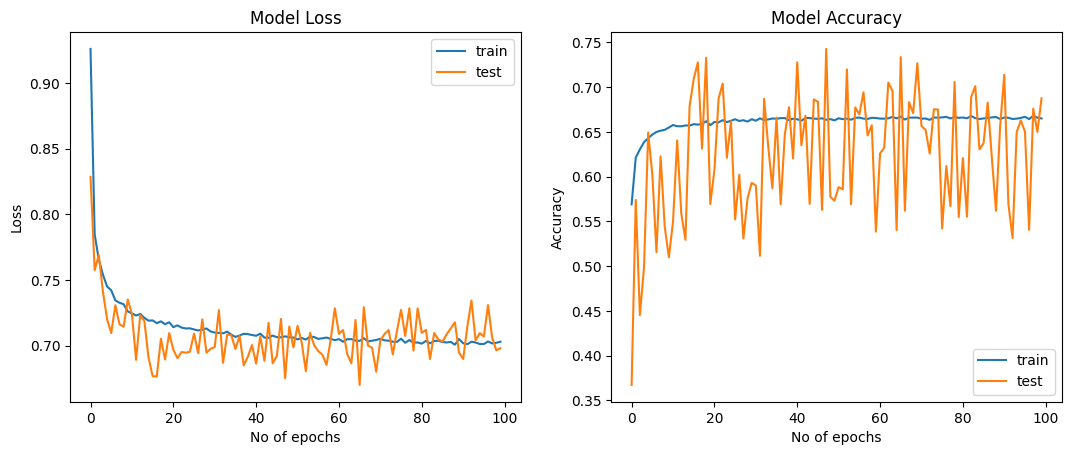

Model 8: three layers with 64, 32, and 16 neurons, batch size 128, learning rate 0.0001

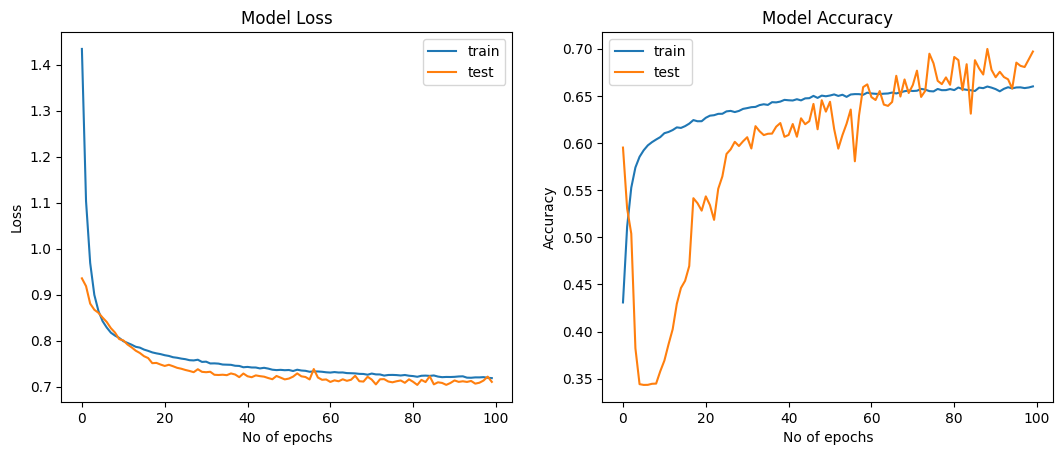

Model 9: three layers with 64, 32, and 16 neurons, batch size 128, learning rate 0.00002

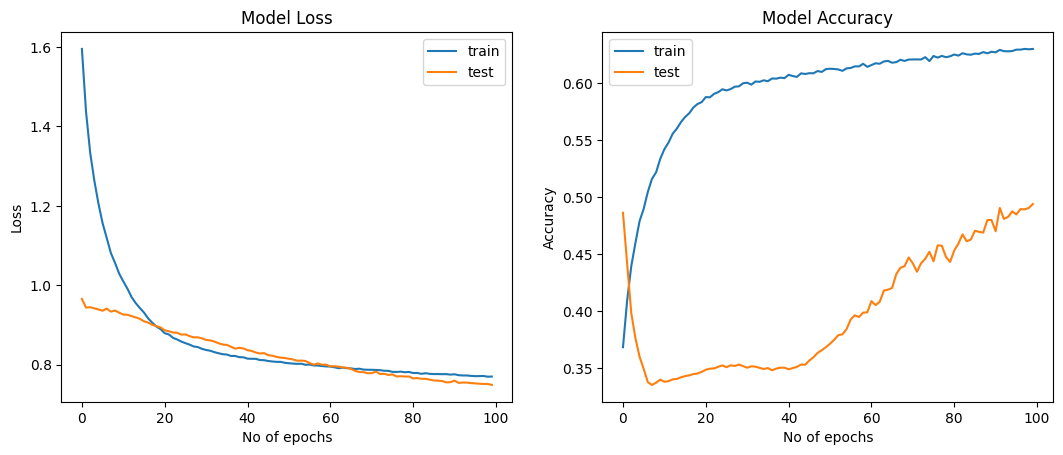

Model 10: three layers with 128, 64, and 32 neurons, batch size 128, learning rate 0.001

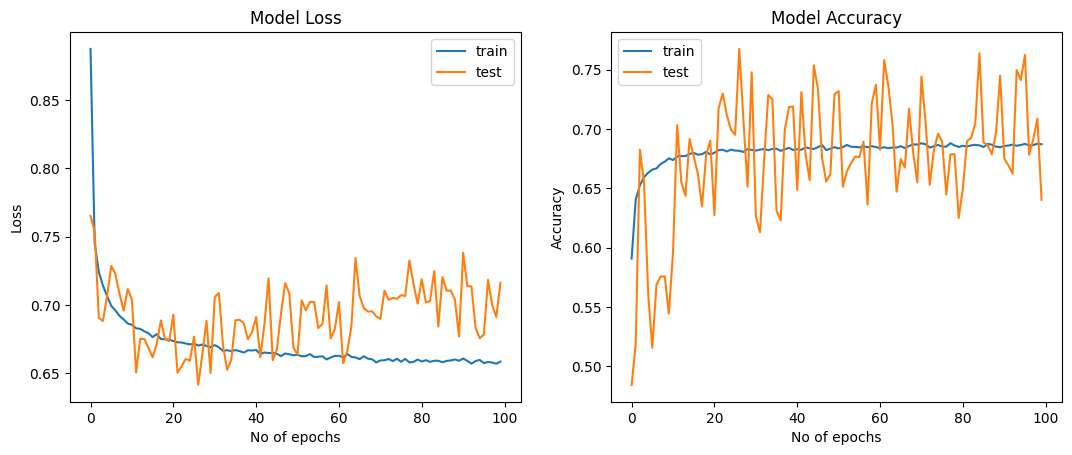

Model 11: three layers with 128, 64, and 32 neurons, batch size 128, learning rate 0.0001

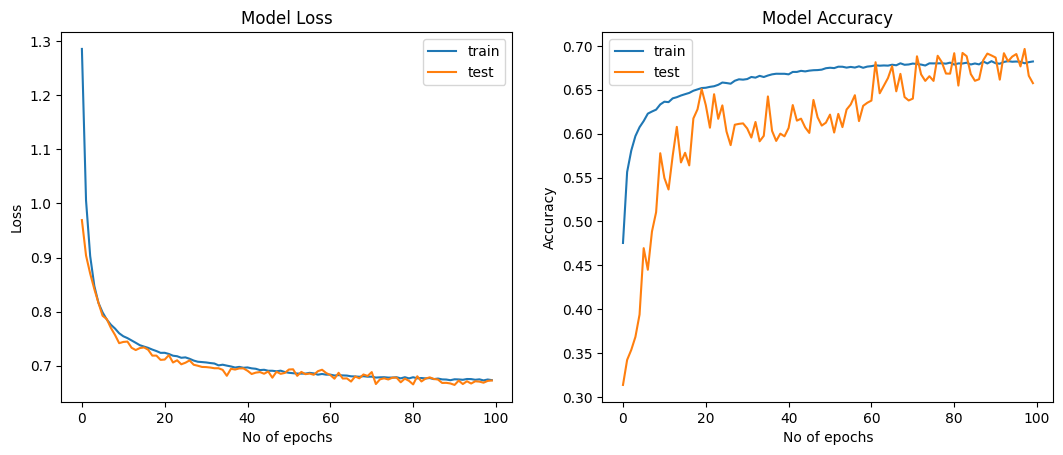

Model 12: three layers with 128, 64, and 32 neurons, batch size 128, learning rate 0.00001

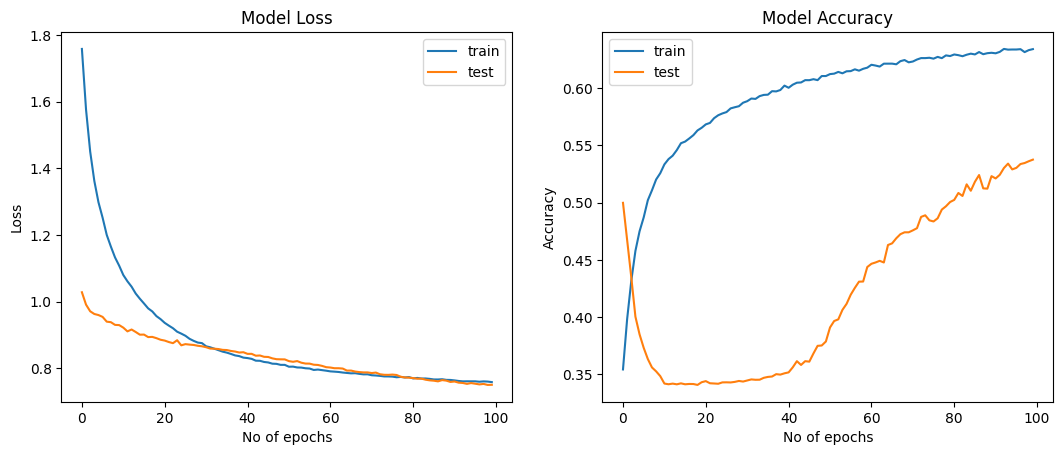